In [1]:
import sympy as sym
from sym_helper import eqnsubs

In [2]:
sym.init_printing()

In [3]:
# Declare symbols
sym.var('R1, R2, L, C, t')
sym.var('vright, ileft, vc, il', cls=sym.Function)
unks = [vc(t), il(t)]

In [4]:
# Known values and functions
elevar = [R1, R2, L, C]
eleval = [20, 20, 20, 8e-3]
funvar = [vright(t), ileft(t)]
oldfunvals = [30, 4]
newfunvals = [0, 4]

In [14]:
# DCSS Equations and solutions
ss1 = il(0)-ileft(t)
ss2 = vc(0)/R1+(vc(0)-vright(t))/R2
oldeqns = [ss1, ss2]
oldeqns

In [6]:
noldeqns = eqnsubs(oldeqns, elevar+funvar, eleval+oldfunvals)
noldeqns

In [7]:
icsoln = sym.solve(noldeqns)
icsoln

In [8]:
# Model equations
KCLn1 = -ileft(t) + il(t) + vc(t)/R1 + C*vc(t).diff(t) + (vc(t)-vright(t))/R2
KVLl2 = vc(t) - L*il(t).diff(t)

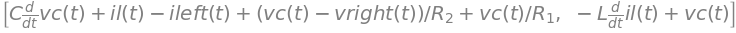

In [9]:
# Collect equations
eqns = [KCLn1, KVLl2]
eqns

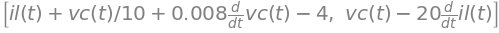

In [10]:
# Make equations numerical
neqns = eqnsubs(eqns, elevar+funvar, eleval+newfunvals)
neqns

In [11]:
# Solve and display
sol = sym.dsolve(neqns, unks, ics=icsoln[0])
sol

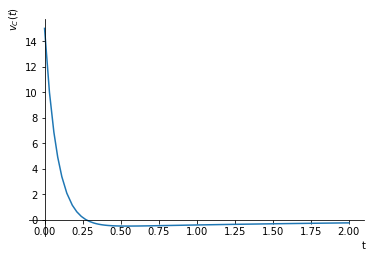

In [12]:
sym.plot(sol[0].rhs, (t, 0, 2), xlabel="t", ylabel=r"$v_C(t)$", show=False).save("AS7eExp8p8plot1.png")

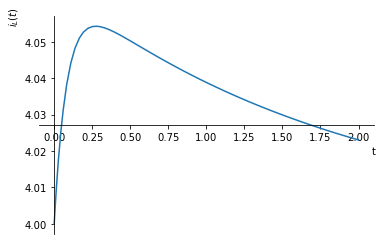

In [13]:
p2=sym.plot(sol[1].rhs, (t, 0, 2), xlabel="t", ylabel=r"$i_L(t)$", show=False).save("AS7eExp8p8plot2.png")